# 🧊 3D Shapes Visualization in Python (Equivalent to MATLAB Code)
This notebook replicates a MATLAB script that plots a sphere, cube, cylinder, torus, and distorted sphere using matplotlib and numpy.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.colors import LightSource


# Create a LightSource object
ls = LightSource(azdeg=0, altdeg=0) # Light from the west, 45 degrees u

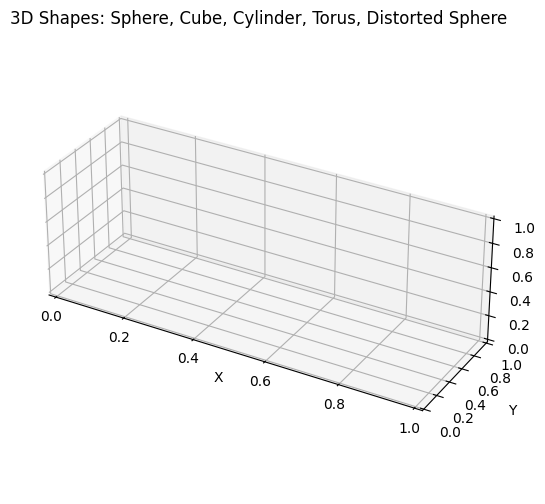

In [2]:
# Setup figure
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3D Shapes: Sphere, Cube, Cylinder, Torus, Distorted Sphere')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([3,1,1])

In [ ]:
# 1. Sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
xs = np.cos(u) * np.sin(v)
ys = np.sin(u) * np.sin(v)
zs = np.cos(v)
rgb = ls.shade(zs, cmap=matplotlib.cm.gist_earth, vert_exag=0.1, blend_mode='soft')
ax.plot_surface(xs, ys, zs, alpha=0.8, facecolors=rgb, linewidth=0, antialiased=False, shade=False)
plt.show()

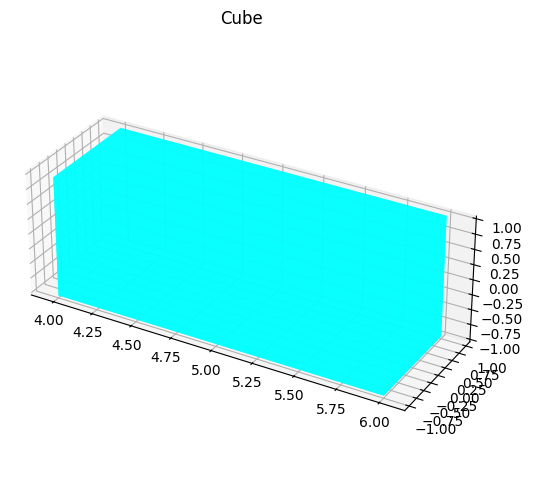

In [4]:
# 2. Cube
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Cube')
ax.set_box_aspect([3,1,1])

cube_verts = np.array([
    [-1, -1, -1],
    [ 1, -1, -1],
    [ 1,  1, -1],
    [-1,  1, -1],
    [-1, -1,  1],
    [ 1, -1,  1],
    [ 1,  1,  1],
    [-1,  1,  1]
]) + np.array([5, 0, 0])

cube_faces = [
    [0, 1, 2, 3],
    [4, 5, 6, 7],
    [0, 1, 5, 4],
    [2, 3, 7, 6],
    [0, 3, 7, 4],
    [1, 2, 6, 5]
]

ax.add_collection3d(Poly3DCollection([
    [cube_verts[vert] for vert in face] for face in cube_faces
], facecolors='cyan', alpha=0.8))
plt.show()

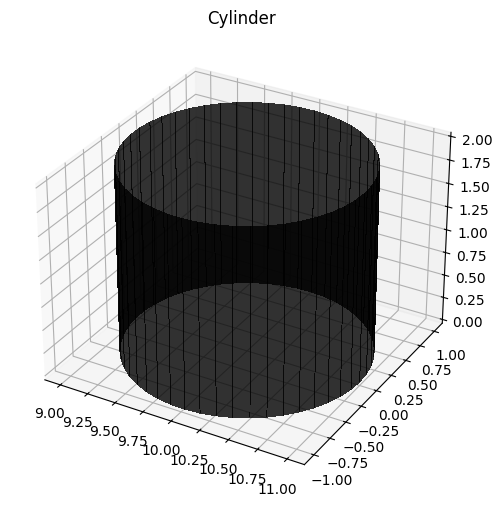

In [8]:
# 3. Cylinder
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Cylinder')

theta = np.linspace(0, 2*np.pi, 50)
z = np.array([0, 2])
theta, z = np.meshgrid(theta, z)
xcyl = np.cos(theta)
ycyl = np.sin(theta)
zcyl = z

rgb = ls.shade(zcyl, cmap=matplotlib.cm.gist_earth, vert_exag=0.1, blend_mode='soft')

ax.plot_surface(xcyl + 10, ycyl, zcyl, alpha=0.8, facecolors=rgb, linewidth=0, antialiased=False, shade=False)
plt.show()

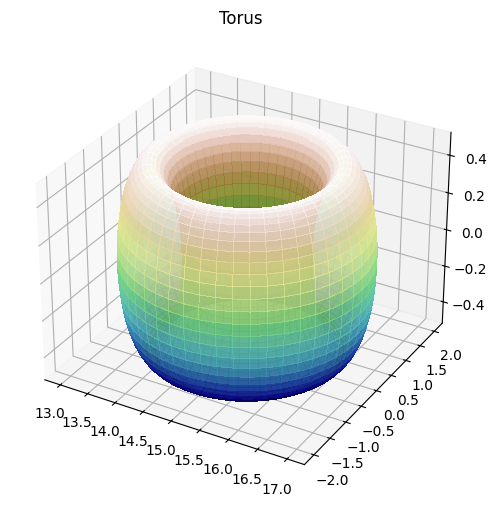

In [9]:
# 4. Torus
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Torus')

theta, phi = np.meshgrid(np.linspace(0, 2*np.pi, 50), np.linspace(0, 2*np.pi, 50))
R, r = 1.5, 0.5
xtor = (R + r * np.cos(phi)) * np.cos(theta)
ytor = (R + r * np.cos(phi)) * np.sin(theta)
ztor = r * np.sin(phi)

rgb = ls.shade(ztor, cmap=matplotlib.cm.gist_earth, vert_exag=0.1, blend_mode='soft')

ax.plot_surface(xtor + 15, ytor, ztor, alpha=0.8, facecolors=rgb, linewidth=0, antialiased=False, shade=False)
plt.show()

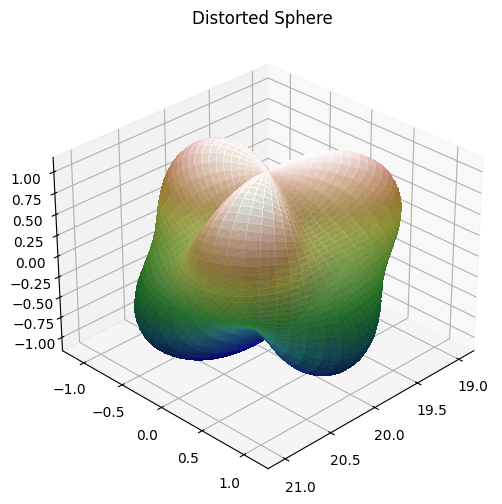

In [10]:
# 5. Distorted Sphere
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Distorted Sphere')

n = 100
theta_d, phi_d = np.meshgrid(np.linspace(0, 2*np.pi, n), np.linspace(0, np.pi, n))
rd = 1 + 0.3 * np.sin(3*theta_d) * np.sin(2*phi_d)
xd = rd * np.sin(phi_d) * np.cos(theta_d)
yd = rd * np.sin(phi_d) * np.sin(theta_d)
zd = rd * np.cos(phi_d)
rgb = ls.shade(zd, cmap=matplotlib.cm.gist_earth, vert_exag=0.1, blend_mode='soft')
ax.plot_surface(xd + 20, yd, zd, alpha=0.8, facecolors=rgb, linewidth=0, antialiased=False, shade=False)
ax.view_init(elev=30, azim=45)
plt.show()

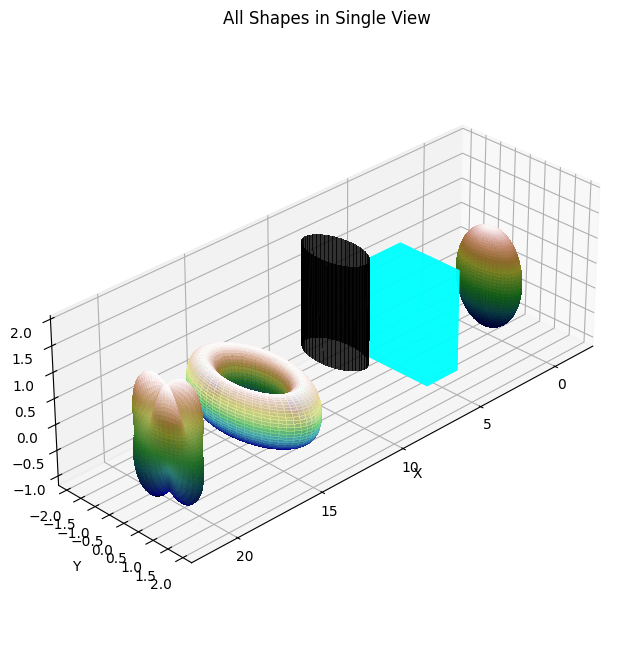

In [11]:
# All shapes in one plot
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('All Shapes in Single View')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([3,1,1])

# Sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
xs = np.cos(u) * np.sin(v)
ys = np.sin(u) * np.sin(v)
zs = np.cos(v)
rgb = ls.shade(zs, cmap=matplotlib.cm.gist_earth, vert_exag=0.1, blend_mode='soft')
ax.plot_surface(xs, ys, zs, alpha=0.8, facecolors=rgb, linewidth=0, antialiased=False, shade=False)

# Cube
cube_verts = np.array([
    [-1, -1, -1], [ 1, -1, -1], [ 1,  1, -1], [-1,  1, -1],
    [-1, -1,  1], [ 1, -1,  1], [ 1,  1,  1], [-1,  1,  1]
]) + np.array([5, 0, 0])
cube_faces = [[0,1,2,3],[4,5,6,7],[0,1,5,4],[2,3,7,6],[0,3,7,4],[1,2,6,5]]
ax.add_collection3d(Poly3DCollection([[cube_verts[vert] for vert in face] for face in cube_faces], facecolors='cyan', alpha=0.8))

# Cylinder
theta = np.linspace(0, 2*np.pi, 50)
z = np.array([0, 2])
theta, z = np.meshgrid(theta, z)
xcyl = np.cos(theta) + 10
ycyl = np.sin(theta)
zcyl = z
rgb = ls.shade(zcyl, cmap=matplotlib.cm.gist_earth, vert_exag=0.1, blend_mode='soft')
ax.plot_surface(xcyl, ycyl, zcyl, alpha=0.8, facecolors=rgb, linewidth=0, antialiased=False, shade=False)

# Torus
theta, phi = np.meshgrid(np.linspace(0, 2*np.pi, 50), np.linspace(0, 2*np.pi, 50))
R, r = 1.5, 0.5
xtor = (R + r * np.cos(phi)) * np.cos(theta) + 15
ytor = (R + r * np.cos(phi)) * np.sin(theta)
ztor = r * np.sin(phi)
rgb = ls.shade(ztor, cmap=matplotlib.cm.gist_earth, vert_exag=0.1, blend_mode='soft')
ax.plot_surface(xtor, ytor, ztor, alpha=0.8, facecolors=rgb, linewidth=0, antialiased=False, shade=False)

# Distorted Sphere
n = 100
theta_d, phi_d = np.meshgrid(np.linspace(0, 2*np.pi, n), np.linspace(0, np.pi, n))
rd = 1 + 0.3 * np.sin(3
                      *theta_d) * np.sin(2*phi_d)
xd = rd * np.sin(phi_d) * np.cos(theta_d) + 20
yd = rd * np.sin(phi_d) * np.sin(theta_d)
zd = rd * np.cos(phi_d)
rgb = ls.shade(zd, cmap=matplotlib.cm.gist_earth, vert_exag=0.1, blend_mode='soft')
ax.plot_surface(xd, yd, zd, alpha=0.8, facecolors=rgb, linewidth=0, antialiased=False, shade=False)

ax.view_init(elev=30, azim=45)
plt.show()

### 🪨 Adding a Pebble Shape
We define a 'pebble' as an **asymmetric, squashed ellipsoid** with some surface distortion.

**Pebble parametric equations:**
\begin{align*}
x(\theta, \phi) &= a(1 + 0.1 \sin(3\theta)) \sin(\phi) \cos(\theta) \\
y(\theta, \phi) &= b(1 + 0.1 \cos(2\phi)) \sin(\phi) \sin(\theta) \\
z(\theta, \phi) &= c \cos(\phi)
\end{align*}

Where:
- \( a = 1.2 \), \( b = 0.8 \), \( c = 0.6 \) are the squashing/stretching factors.
- The small sine/cosine terms add organic-looking surface ripples.
- \( \theta \in [0, 2\pi] \), \( \phi \in [0, \pi] \)

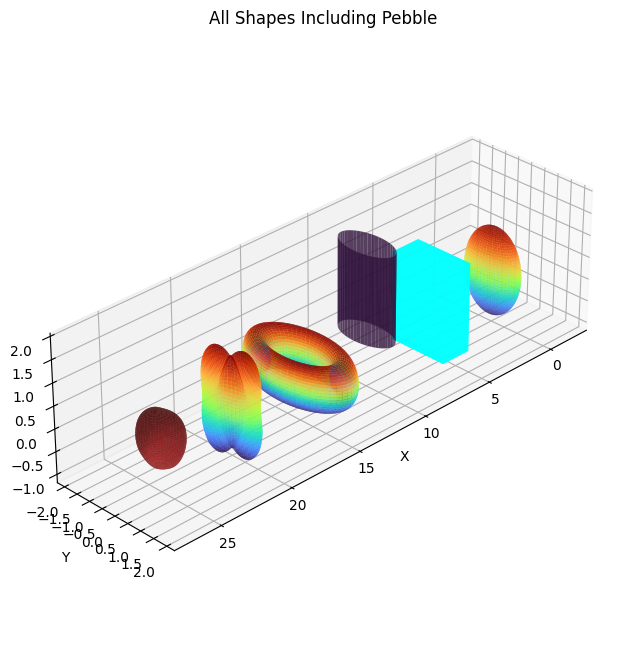

In [9]:
# Add pebble to all-in-one view
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('All Shapes Including Pebble')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([3.5, 1, 1])

# Sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
xs = np.cos(u) * np.sin(v)
ys = np.sin(u) * np.sin(v)
zs = np.cos(v)
ax.plot_surface(xs, ys, zs, alpha=0.8, cmap='turbo')

# Cube
cube_verts = np.array([
    [-1, -1, -1], [ 1, -1, -1], [ 1,  1, -1], [-1,  1, -1],
    [-1, -1,  1], [ 1, -1,  1], [ 1,  1,  1], [-1,  1,  1]
]) + np.array([5, 0, 0])
cube_faces = [[0,1,2,3],[4,5,6,7],[0,1,5,4],[2,3,7,6],[0,3,7,4],[1,2,6,5]]
ax.add_collection3d(Poly3DCollection([[cube_verts[vert] for vert in face] for face in cube_faces], facecolors='cyan', alpha=0.8))

# Cylinder
theta = np.linspace(0, 2*np.pi, 50)
z = np.array([0, 2])
theta, z = np.meshgrid(theta, z)
xcyl = np.cos(theta) + 10
ycyl = np.sin(theta)
zcyl = z
ax.plot_surface(xcyl, ycyl, zcyl, alpha=0.8, cmap='turbo')

# Torus
theta, phi = np.meshgrid(np.linspace(0, 2*np.pi, 50), np.linspace(0, 2*np.pi, 50))
R, r = 1.5, 0.5
xtor = (R + r * np.cos(phi)) * np.cos(theta) + 15
ytor = (R + r * np.cos(phi)) * np.sin(theta)
ztor = r * np.sin(phi)
ax.plot_surface(xtor, ytor, ztor, alpha=0.8, cmap='turbo')

# Distorted Sphere
n = 100
theta_d, phi_d = np.meshgrid(np.linspace(0, 2*np.pi, n), np.linspace(0, np.pi, n))
rd = 1 + 0.3 * np.sin(3*theta_d) * np.sin(2*phi_d)
xd = rd * np.sin(phi_d) * np.cos(theta_d) + 20
yd = rd * np.sin(phi_d) * np.sin(theta_d)
zd = rd * np.cos(phi_d)
ax.plot_surface(xd, yd, zd, alpha=0.8, cmap='turbo')

# Pebble
a, b, c = 1.2, 0.8, 0.6
theta_p, phi_p = np.meshgrid(np.linspace(0, 2*np.pi, 100), np.linspace(0, np.pi, 100))
xp = a * (1 + 0.1 * np.sin(3*theta_p)) * np.sin(phi_p) * np.cos(theta_p) + 25
yp = b * (1 + 0.1 * np.cos(2*phi_p)) * np.sin(phi_p) * np.sin(theta_p)
zp = c * np.cos(phi_p)
ax.plot_surface(xp, yp, zp, alpha=0.9, color='brown')

ax.view_init(elev=30, azim=45)
plt.show()

### 🪨 Superquadric Pebbles
Pebbles are generated using superquadric surface equations with randomized parameters to simulate natural variation.

**Superquadric equations:**
\begin{align*}
x(u, v) &= a_1 \cdot \cos^{\epsilon_1}(v) \cdot \cos^{\epsilon_2}(u) \\
y(u, v) &= a_2 \cdot \cos^{\epsilon_1}(v) \cdot \sin^{\epsilon_2}(u) \\
z(u, v) &= a_3 \cdot \sin^{\epsilon_1}(v)
\end{align*}

Where:
- \( a_1, a_2, a_3 \) control the scale in X, Y, Z.
- \( \epsilon_1, \epsilon_2 \) control the shape roundness.
- \( u \in [-\pi, \pi], \ v \in [-\pi/2, \pi/2] \).

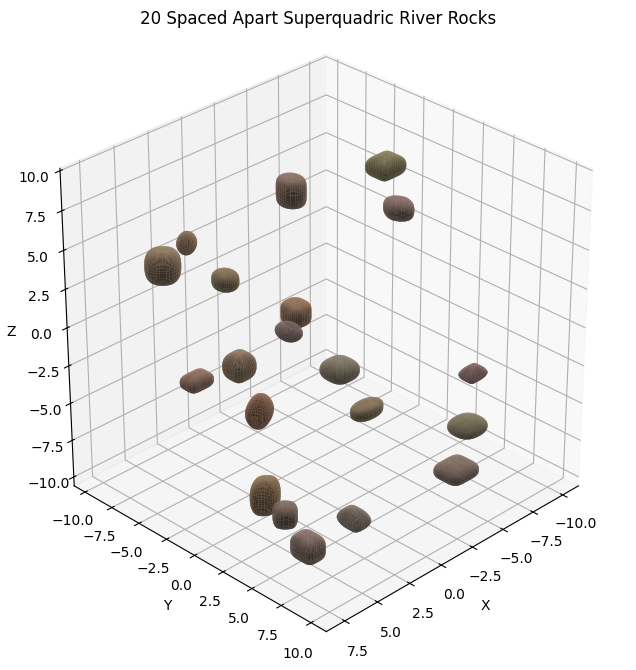

In [11]:
from scipy.spatial.distance import cdist

# Parameters
n = 80
num_rocks = 20
min_dist = 0.0
rock_positions = []

# Generate rock positions
while len(rock_positions) < num_rocks:
    new_pos = 20 * (np.random.rand(1, 3) - 0.5)  # Random position in [-10,10]
    if len(rock_positions) == 0 or np.all(cdist(rock_positions, new_pos) > min_dist):
        rock_positions.append(new_pos[0])
rock_positions = np.array(rock_positions)

# Signed exponentiation
def cos_e(angle, expn):
    return np.sign(np.cos(angle)) * np.abs(np.cos(angle)) ** expn

def sin_e(angle, expn):
    return np.sign(np.sin(angle)) * np.abs(np.sin(angle)) ** expn

# Generate and plot rocks
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("20 Spaced Apart Superquadric River Rocks")

u, v = np.meshgrid(np.linspace(-np.pi, np.pi, n), np.linspace(-np.pi/2, np.pi/2, n))

for pos in rock_positions:
    a1 = 0.6 + 0.6 * np.random.rand()
    a2 = 0.6 + 0.6 * np.random.rand()
    a3 = 0.4 + 0.8 * np.random.rand()
    eps1 = 0.3 + 1.0 * np.random.rand()
    eps2 = 0.3 + 1.0 * np.random.rand()

    X = a1 * cos_e(v, eps1) * cos_e(u, eps2) + pos[0]
    Y = a2 * cos_e(v, eps1) * sin_e(u, eps2) + pos[1]
    Z = a3 * sin_e(v, eps1) + pos[2]

    color = np.array([0.6, 0.5, 0.4]) + 0.1 * np.random.rand(3)
    ax.plot_surface(X, Y, Z, color=color, edgecolor='none', shade='True', alpha=1.0)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.axis('auto')
ax.set_box_aspect([1,1,1])
ax.view_init(elev=30, azim=45)
plt.show()